In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


(720, 1080, 3)
The image consists of 777600 pixels


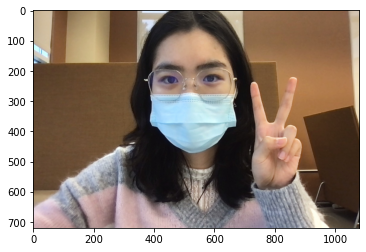

In [3]:

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

painting=plt.imread("/content/drive/MyDrive/2021_Zhebin_CSThesis/Coding/Real_Time_Image/Image_test.jpg")
print(painting.shape)
print("The image consists of %i pixels" % (painting.shape[0] * painting.shape[1]))
plt.imshow(painting);



# resize the input image into 96*96*3 in greyscale 
def resize(image_item):
  return 0


flip the image

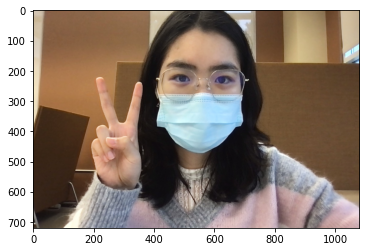

In [4]:
plt.imshow(painting[:,::-1]);      

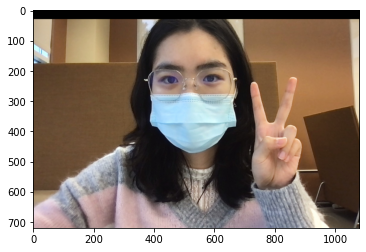

In [5]:
painting2 = painting.copy()    # don't mess the original painting!
painting2[0:30, :, :] = 1.0    # max value for all three components produces white
plt.imshow(painting2);

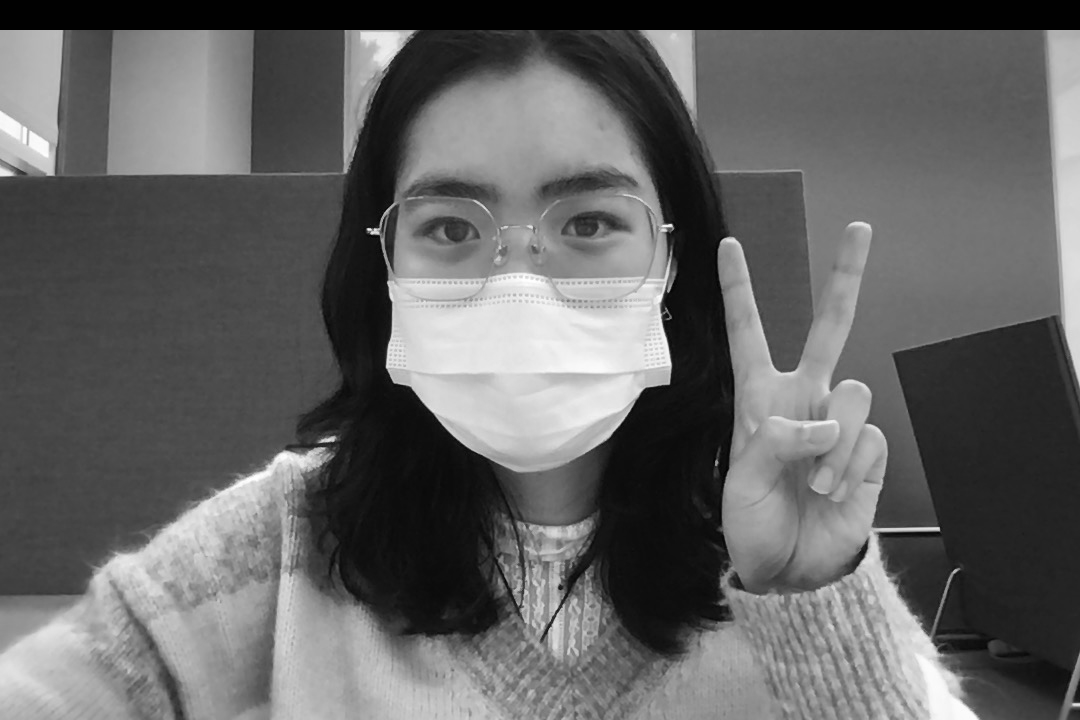

(720, 1080)


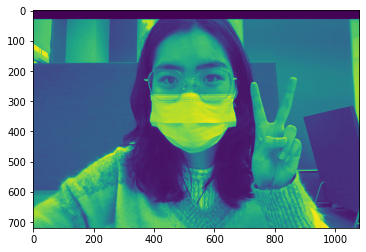

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
gray_image = cv.cvtColor(painting2, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
plt.imshow(gray_image)
print(gray_image.shape)

(720, 1080)
width: 720
height: 1080


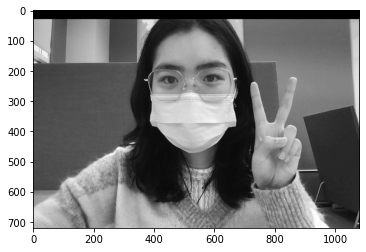

In [7]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

gray = rgb2gray(painting2)

plt.imshow(gray, cmap = plt.get_cmap('gray'))
print(gray.shape)
print("width:", gray.shape[0])
print('height:', gray.shape[1])
# print('depth:', gray.shape[2])   no depth? 

Resized Dimensions: (96, 96, 3)


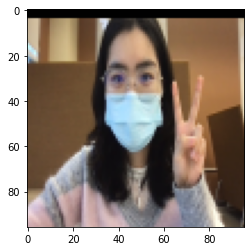

In [8]:
# resize the image to 48*48*3
width = 96
height = 96
dim = (width, height)
resized_image = cv.resize(painting2,dim,interpolation = cv.INTER_AREA)


print('Resized Dimensions:', resized_image.shape)

plt.imshow(resized_image)


(96, 96)
width: 96
height: 96


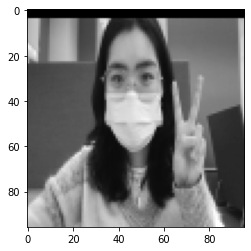

In [9]:
gray2 = rgb2gray(resized_image)

plt.imshow(gray2, cmap = plt.get_cmap('gray'))
print(gray2.shape)
print("width:", gray2.shape[0])
print('height:', gray2.shape[1])

Reference: https://moonbooks.org/Articles/How-to-convert-an-image-to-grayscale-using-python-/

(96, 96, 3)


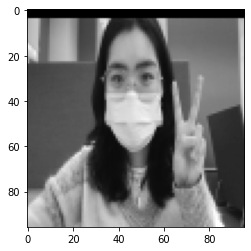

In [10]:
# convert the (96*96) image to (96*96*3) image in greyscale

img = gray2

stacked_img = np.stack((img,)*3, axis=-1)
print(stacked_img.shape)

plt.imshow(gray2, cmap = plt.get_cmap('gray'))

In [14]:
def aug_image(x):
    
    # convert to 3 channel (RGB)
    x = np.stack((x,)*3, axis=-1) 
    
    return x

# Convert the entire Validation Set at once
def aug_val_data(x):
    num_samples = x.shape[0]
    print("num_samples:", num_samples)
    x_data = [aug_image(im) for im in x[0:num_samples]]
    return np.array(x_data)

print(aug_val_data(stacked_img))

num_samples: 96
(96, 96, 3, 3)
